In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
data = pd.read_csv('./digit/train.csv')

In [3]:
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x = data.drop('label',axis=1)
y = data.drop(x.columns,axis=1)


In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
x.shape

(42000, 784)

In [7]:
x = x.reshape(42000,28,28,1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 1), (8400, 1))

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
import tensorflow as tf

In [13]:
tf.reset_default_graph()

In [14]:
clf_model= Sequential()

In [15]:
clf_model.add(Conv2D(filters=64,kernel_size=2,strides=2,padding='valid',activation='relu',input_shape =[28,28,1]))


W0721 13:24:11.069872 10596 deprecation.py:506] From C:\Users\MAHI SONI\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
clf_model.add(Conv2D(filters=256,kernel_size=2,strides=1,padding='valid',activation='relu'))
clf_model.add(MaxPool2D())

In [17]:
clf_model.add(Conv2D(filters=64,kernel_size=2,strides=1,padding='valid',activation='relu'))
clf_model.add(Dropout(rate = .5))

In [18]:
clf_model.add(Flatten())

In [19]:
clf_model.add(Dense(10,'softmax'))

In [20]:
clf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       65792     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          65600     
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [21]:
clf_model.compile('adam','sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
clf_model.fit(x_train,
              y_train,
              batch_size=2048,
              epochs=10,
              callbacks=None,
              validation_data=(x_test,y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 40s 1ms/sample - loss: 6.0643 - acc: 0.3304 - val_loss: 1.0829 - val_acc: 0.6719
Epoch 2/10
33600/33600 [==============================] - 41s 1ms/sample - loss: 1.0490 - acc: 0.6577 - val_loss: 0.3967 - val_acc: 0.8765
Epoch 3/10
33600/33600 [==============================] - 40s 1ms/sample - loss: 0.5747 - acc: 0.8189 - val_loss: 0.2214 - val_acc: 0.9346
Epoch 4/10
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.3878 - acc: 0.8810 - val_loss: 0.1601 - val_acc: 0.9505
Epoch 5/10
33600/33600 [==============================] - 41s 1ms/sample - loss: 0.3021 - acc: 0.9060 - val_loss: 0.1202 - val_acc: 0.9623
Epoch 6/10
33600/33600 [==============================] - 42s 1ms/sample - loss: 0.2453 - acc: 0.9226 - val_loss: 0.0998 - val_acc: 0.9682
Epoch 7/10
33600/33600 [==============================] - 43s 1ms/sample - loss: 0.2144 - acc: 0.9328 - val_loss: 0.0

In [23]:
pred = clf_model.predict(x_test.reshape(-1,28,28,1))


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
pred_ix = [list(row).index(np.max(row))for row in pred]

In [26]:
accuracy_score(pred_ix,y_test)

0.9771428571428571

## Testing of Model

In [27]:
import cv2

In [28]:
im = cv2.imread("index.png",cv2.IMREAD_GRAYSCALE)

In [29]:
im.shape

(224, 225)

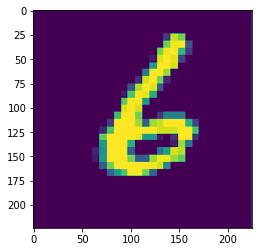

In [30]:
plt.imshow(im)

In [31]:
im = cv2.resize(im,(28,28))

In [32]:
pre = clf_model.predict(im.reshape(-1,28,28,1))

In [33]:
pre

array([[1.1883615e-04, 4.0390400e-06, 1.9323359e-05, 4.1784337e-05,
        1.3501255e-05, 2.9929072e-04, 9.9943429e-01, 6.1184555e-09,
        6.8831680e-05, 4.2630298e-08]], dtype=float32)

In [34]:
pre_ix = [list(row).index(np.max(row))for row in pre]

In [35]:
(np.unique(data['label']))[pre_ix]

array([6], dtype=int64)

## 2

In [36]:
im1 = cv2.imread("index1.png",cv2.IMREAD_GRAYSCALE)

In [37]:
im1.shape

(1480, 1490)

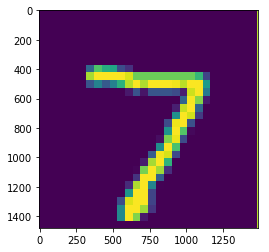

In [38]:
plt.imshow(im1)

In [39]:
im1 = cv2.resize(im1,(28,28))

In [40]:
pre1 = clf_model.predict(im1.reshape(-1,28,28,1))

In [41]:
pre1

array([[2.1708562e-09, 1.3393192e-10, 1.9207546e-06, 3.0416977e-06,
        8.2071914e-13, 8.5005786e-10, 3.9880408e-14, 9.9999499e-01,
        3.2033280e-09, 1.0190141e-08]], dtype=float32)

In [42]:
pre_ix1 = [list(row).index(np.max(row))for row in pre1]

In [43]:
(np.unique(data['label']))[pre_ix1]

array([7], dtype=int64)